In [1]:
from causalgraphicalmodels import CausalGraphicalModel

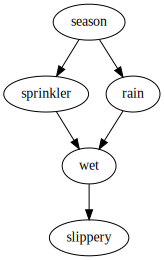

In [2]:
sprinkler = CausalGraphicalModel(
    nodes=["season", "rain", "sprinkler", "wet", "slippery"],
    edges=[
        ("season", "rain"), 
        ("season", "sprinkler"), 
        ("rain", "wet"),
        ("sprinkler", "wet"), 
        ("wet", "slippery")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()

In [3]:
# get the distribution implied by the graph
print(sprinkler.get_distribution())

P(season)P(rain|season)P(sprinkler|season)P(wet|rain,sprinkler)P(slippery|wet)


In [5]:
 #check for d-seperation of two nodes
sprinkler.is_d_separated("slippery", "season", {"wet"})

True

In [6]:
# get all the conditional independence relationships implied by a CGM
sprinkler.get_all_independence_relationships()

[('slippery', 'season', {'wet'}),
 ('slippery', 'season', {'sprinkler', 'wet'}),
 ('slippery', 'season', {'rain', 'sprinkler'}),
 ('slippery', 'season', {'rain', 'wet'}),
 ('slippery', 'season', {'rain', 'sprinkler', 'wet'}),
 ('slippery', 'sprinkler', {'wet'}),
 ('slippery', 'sprinkler', {'season', 'wet'}),
 ('slippery', 'sprinkler', {'rain', 'wet'}),
 ('slippery', 'sprinkler', {'rain', 'season', 'wet'}),
 ('slippery', 'rain', {'wet'}),
 ('slippery', 'rain', {'season', 'wet'}),
 ('slippery', 'rain', {'sprinkler', 'wet'}),
 ('slippery', 'rain', {'season', 'sprinkler', 'wet'}),
 ('season', 'wet', {'rain', 'sprinkler'}),
 ('season', 'wet', {'rain', 'slippery', 'sprinkler'}),
 ('sprinkler', 'rain', {'season'})]

In [7]:
# check backdoor adjustment set
sprinkler.is_valid_backdoor_adjustment_set("rain", "slippery", {"wet"})

False

In [8]:
# get all backdoor adjustment sets
sprinkler.get_all_backdoor_adjustment_sets("rain", "slippery")

frozenset({frozenset({'season'}),
           frozenset({'sprinkler'}),
           frozenset({'season', 'sprinkler'})})

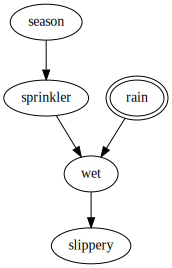

In [9]:
# get the graph created by intervening on node "rain"
do_sprinkler = sprinkler.do("rain")

do_sprinkler.draw()

# Latent Variables

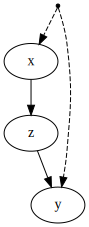

In [10]:
dag_with_latent_variables = CausalGraphicalModel(
    nodes=["x", "y", "z"],
    edges=[
        ("x", "z"),
        ("z", "y"), 
    ],
    latent_edges=[
        ("x", "y")
    ]
)

dag_with_latent_variables.draw()

In [11]:
# here there are no observed backdoor adjustment sets
dag_with_latent_variables.get_all_backdoor_adjustment_sets("x", "y")

frozenset()

In [12]:
# but there is a frontdoor adjustment set
dag_with_latent_variables.get_all_frontdoor_adjustment_sets("x", "y")

frozenset({frozenset({'z'})})

# StructuralCausalModels

In [13]:
from causalgraphicalmodels import StructuralCausalModel
import numpy as np

scm = StructuralCausalModel({
    "x1": lambda     n_samples: np.random.binomial(n=1,p=0.7,size=n_samples),
    "x2": lambda x1, n_samples: np.random.normal(loc=x1, scale=0.1),
    "x3": lambda x2, n_samples: x2 ** 2,
})

In [14]:
ds = scm.sample(n_samples=100)

ds.head()

,x1,x2,x3
0,1,1.065634,1.135576
1,0,-0.295113,0.087092
2,1,0.966626,0.934365
3,1,1.042989,1.087827
4,0,-0.043558,0.001897


C:\Users\Genet Shanko\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Genet Shanko\anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x2', ylabel='x3'>

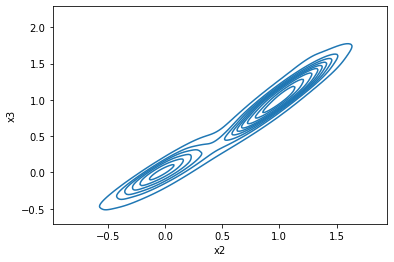

In [15]:
# and visualise the samples
import seaborn as sns

%matplotlib inline

sns.kdeplot(
    data=ds.x2,
    data2=ds.x3,
)

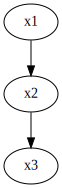

In [16]:
scm.cgm.draw()

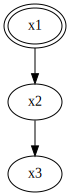

In [17]:
scm_do = scm.do("x1")

scm_do.cgm.draw()

In [18]:
scm_do.sample(n_samples=5, set_values={"x1": np.arange(5)})

,x1,x2,x3
0,0,-0.049989,0.002499
1,1,0.913836,0.835096
2,2,1.885461,3.554965
3,3,3.022591,9.136056
4,4,4.063172,16.509363
